In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def extract_close(filepath,stock_number):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(df['Date'])
    close_col = 'Close-Stock-'+str(stock_number)
    df = df[close_col]
    return df

In [3]:
def train_val_test_split(closing_price):
    last_idx = (closing_price.shape[0]- 1)
    train_idx = int(0.7*(closing_price.shape[0]- 1))
    training_set = closing_price[0:train_idx]
    val_idx = int(0.9 * (closing_price.shape[0]- 1))
    validation_set = closing_price[train_idx:val_idx]
    test_set = closing_price[val_idx:(closing_price.shape[0])]
    print('indexes for the splits')
    print((0,train_idx-1),(train_idx,val_idx-1),(val_idx,closing_price.shape[0]- 1))
    return train_idx,val_idx,last_idx,training_set,validation_set,test_set

In [4]:
def make_fit_set(train_set):
    fit_set = train_set.reset_index().drop('Date',axis=1).copy().iloc[:,0].copy()
    return fit_set

In [5]:
def show_optimal(close_prices,seasonality = False,stepWise = True):
    model_selector = arima_model = auto_arima(close_prices,p=1,start_q=1,max_p=10,max_d=5,max_q=15,n_fits=200,seasonal = seasonality,trace = True,stepwise=stepWise,suppress_warnings=True)
    print(model_selector.summary())

In [6]:
def rmse(actual,prediction):
    print('Test RMSE: %.3f' % sqrt(mean_squared_error(actual,prediction)))


In [107]:
submission_col = pd.read_csv('data/new_sample_submission.csv').columns
submission_idx = pd.to_datetime(pd.read_csv('data/new_test.csv')['Date'])
submission = pd.DataFrame(index= submission_idx,columns= submission_col)
submission.drop('Date',axis = 1, inplace = True)
submission.fillna(0.0,inplace=True)
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,0.0,0.0,0.0,0.0,0.0
2011-08-05,0.0,0.0,0.0,0.0,0.0
2011-08-08,0.0,0.0,0.0,0.0,0.0
2011-08-09,0.0,0.0,0.0,0.0,0.0
2011-08-10,0.0,0.0,0.0,0.0,0.0


In [28]:
submission.shape

(97, 5)

## Stock 1

In [52]:
dfrm = extract_close('data/stocks_train/stock_1.csv',1)
dfrm.head()

Date
2010-06-01    1855.10
2010-06-02    1853.05
2010-06-03    1905.60
2010-06-04    1885.70
2010-06-07    1876.65
Name: Close-Stock-1, dtype: float64

In [53]:
t_idx,v_idx,l_idx,train_set,val_set,test_set = train_val_test_split(dfrm)

indexes for the splits
(0, 207) (208, 267) (268, 298)


In [31]:
show_optimal(train_set,stepWise = False)

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2058.783, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2060.576, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2062.572, Time=1.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2064.571, Time=2.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2060.995, Time=2.37 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2056.506, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2060.574, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2062.535, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2061.804, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2061.935, Time=2.78 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2060.559, Time=2.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2062.571, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2064.570, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2060.861, Time=2.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2055.054, Time=4.34 sec
 ARIMA(3,1,

In [66]:
fit_set = make_fit_set(train_set)

In [67]:
for i in range(188):
    model_init = SARIMAX(fit_set,order=(5,1,0))
    model = model_init.fit()
    next_pred = model.forecast()
    print(next_pred)
    fit_set = fit_set.append(next_pred)

208    2202.483663
dtype: float64
209    2201.780485
dtype: float64
210    2204.490659
dtype: float64
211    2206.484645
dtype: float64
212    2201.997253
dtype: float64
213    2199.528586
dtype: float64
214    2199.924494
dtype: float64
215    2199.649464
dtype: float64
216    2198.489726
dtype: float64
217    2198.991032
dtype: float64
218    2199.610123
dtype: float64
219    2199.521005
dtype: float64
220    2199.397467
dtype: float64
221    2199.719733
dtype: float64
222    2199.729345
dtype: float64
223    2199.583999
dtype: float64
224    2199.575447
dtype: float64
225    2199.651389
dtype: float64
226    2199.587878
dtype: float64
227    2199.559151
dtype: float64
228    2199.587155
dtype: float64
229    2199.60239
dtype: float64
230    2199.577085
dtype: float64
231    2199.584778
dtype: float64
232    2199.595799
dtype: float64
233    2199.592835
dtype: float64
234    2199.585463
dtype: float64
235    2199.59167
dtype: float64
236    2199.592102
dtype: float64
237    2199.5892

In [203]:
rmse(fit_set[208:],val_set)

Test RMSE: 139.799


In [207]:
rmse(fit_set[268:],test_set)

Test RMSE: 1197.699


In [110]:
prediction_s1 = fit_set[299:]

In [115]:
submission['Close-Stock-1'] = prediction_s1.reset_index().drop('index',axis=1).set_index(submission.index)

In [117]:
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,0.0,0.0,0.0,0.0
2011-08-05,2199.589967,0.0,0.0,0.0,0.0
2011-08-08,2199.589967,0.0,0.0,0.0,0.0
2011-08-09,2199.589967,0.0,0.0,0.0,0.0
2011-08-10,2199.589967,0.0,0.0,0.0,0.0


## Stock 2

In [118]:
s2_df = extract_close('data/stocks_train/stock_2.csv',2)
s2_df.head()

Date
2010-06-01    283.00
2010-06-02    281.30
2010-06-03    285.50
2010-06-04    290.85
2010-06-07    287.70
Name: Close-Stock-2, dtype: float64

In [119]:
t_idx,v_idx,l_idx,train_set,val_set,test_set = train_val_test_split(s2_df)

indexes for the splits
(0, 207) (208, 267) (268, 298)


In [120]:
show_optimal(train_set,stepWise = False)

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1597.942, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1599.728, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1601.728, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1603.312, Time=1.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1605.168, Time=1.79 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1607.166, Time=2.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1599.728, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1601.693, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1601.517, Time=3.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1603.467, Time=4.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1605.303, Time=5.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1601.728, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1603.728, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1603.548, Time=2.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1607.038, Time=3.48 sec
 ARIMA(3,1,

In [121]:
fit_set = make_fit_set(train_set)

In [122]:
for i in range(188):
    model_init = SARIMAX(fit_set,order=(0,1,0))
    model = model_init.fit()
    next_pred = model.forecast()
    print(next_pred)
    fit_set = fit_set.append(next_pred)

208    173.0
dtype: float64
209    173.0
dtype: float64
210    173.0
dtype: float64
211    173.0
dtype: float64
212    173.0
dtype: float64
213    173.0
dtype: float64
214    173.0
dtype: float64
215    173.0
dtype: float64
216    173.0
dtype: float64
217    173.0
dtype: float64
218    173.0
dtype: float64
219    173.0
dtype: float64
220    173.0
dtype: float64
221    173.0
dtype: float64
222    173.0
dtype: float64
223    173.0
dtype: float64
224    173.0
dtype: float64
225    173.0
dtype: float64
226    173.0
dtype: float64
227    173.0
dtype: float64
228    173.0
dtype: float64
229    173.0
dtype: float64
230    173.0
dtype: float64
231    173.0
dtype: float64
232    173.0
dtype: float64
233    173.0
dtype: float64
234    173.0
dtype: float64
235    173.0
dtype: float64
236    173.0
dtype: float64
237    173.0
dtype: float64
238    173.0
dtype: float64
239    173.0
dtype: float64
240    173.0
dtype: float64
241    173.0
dtype: float64
242    173.0
dtype: float64
243    173.0
dtype: 

In [123]:
val_set.shape,test_set.shape,submission.shape

((60,), (31,), (97, 5))

In [124]:
fit_set[299:].shape

(97,)

In [125]:
prediction_s2 = fit_set[299:]
submission['Close-Stock-2'] = prediction_s2.reset_index().drop('index',axis=1).set_index(submission.index)
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,173.0,0.0,0.0,0.0
2011-08-05,2199.589967,173.0,0.0,0.0,0.0
2011-08-08,2199.589967,173.0,0.0,0.0,0.0
2011-08-09,2199.589967,173.0,0.0,0.0,0.0
2011-08-10,2199.589967,173.0,0.0,0.0,0.0


## Stock 3

In [126]:
s3_df = extract_close('data/stocks_train/stock_3.csv',3)
s3_df.head()

Date
2010-06-01    2077.25
2010-06-02    2079.85
2010-06-03    2114.90
2010-06-04    2146.75
2010-06-07    2185.25
Name: Close-Stock-3, dtype: float64

In [127]:
t_idx,v_idx,l_idx,train_set,val_set,test_set = train_val_test_split(s3_df)

indexes for the splits
(0, 207) (208, 267) (268, 298)


In [249]:
show_optimal(train_set,stepWise = False)

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2123.590, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2124.346, Time=2.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2125.437, Time=0.99 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2126.465, Time=1.54 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2123.535, Time=2.79 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2123.590, Time=2.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2124.501, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2124.186, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2125.990, Time=1.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2127.377, Time=1.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2124.291, Time=3.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2125.416, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2125.394, Time=1.00 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2121.008, Time=2.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2122.857, Time=4.50 sec
 ARIMA(3,1,

In [128]:
fit_set = make_fit_set(train_set)

In [129]:
for i in range(188):
    model_init = SARIMAX(fit_set,order=(2,1,2))
    model = model_init.fit()
    next_pred = model.forecast()
    print(next_pred)
    fit_set = fit_set.append(next_pred)

208    2500.296536
dtype: float64
209    2492.419394
dtype: float64
210    2490.001836
dtype: float64
211    2495.869787
dtype: float64
212    2501.695141
dtype: float64
213    2499.773245
dtype: float64
214    2493.18095
dtype: float64
215    2490.955004
dtype: float64
216    2495.744563
dtype: float64
217    2500.734207
dtype: float64
218    2499.308646
dtype: float64
219    2493.791051
dtype: float64
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
220    2491.7705
dtype: float64
221    2495.677598
dtype: float64
222    2499.946689
dtype: float64
223    2498.904756
dtype: float64
224    2494.289655
dtype: float64
225    2492.450967
dtype: float64
226    2495.634284
dtype: float64
227    2499.286111
dtype: float64
228    2498.541625
dtype: float64
229    2494.684747
dtype: float64
230    2493.030208
dtype: float64
231    24

In [130]:
prediction_s3 = fit_set[299:]
submission['Close-Stock-3'] = prediction_s3.reset_index().drop('index',axis=1).set_index(submission.index)
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,173.0,2496.157836,0.0,0.0
2011-08-05,2199.589967,173.0,2495.894858,0.0,0.0
2011-08-08,2199.589967,173.0,2496.003785,0.0,0.0
2011-08-09,2199.589967,173.0,2496.315731,0.0,0.0
2011-08-10,2199.589967,173.0,2496.404015,0.0,0.0


## Stock 4

In [131]:
s4_df = extract_close('data/stocks_train/stock_4.csv',4)
s4_df.head()

Date
2010-06-01    837.95
2010-06-02    842.30
2010-06-03    854.10
2010-06-04    865.85
2010-06-07    841.95
Name: Close-Stock-4, dtype: float64

In [132]:
t_idx,v_idx,l_idx,train_set,val_set,test_set = train_val_test_split(s4_df)

indexes for the splits
(0, 207) (208, 267) (268, 298)


In [133]:
show_optimal(train_set,stepWise = False)

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1858.840, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1860.799, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1862.797, Time=1.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1858.935, Time=1.84 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1859.309, Time=1.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1858.720, Time=1.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1860.800, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1862.799, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1860.735, Time=0.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1858.256, Time=1.49 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1860.241, Time=1.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1862.788, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1862.389, Time=0.95 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1860.682, Time=1.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1859.863, Time=2.33 sec
 ARIMA(3,1,

In [134]:
fit_set = make_fit_set(train_set)

In [135]:
for i in range(188):
    model_init = SARIMAX(fit_set,order=(1,1,3))
    model = model_init.fit()
    next_pred = model.forecast()
    print(next_pred)
    fit_set = fit_set.append(next_pred)

208    1054.525809
dtype: float64
209    1046.694579
dtype: float64
210    1048.890574
dtype: float64
211    1047.69886
dtype: float64
212    1048.344727
dtype: float64
213    1047.994615
dtype: float64
214    1048.18461
dtype: float64
215    1048.081526
dtype: float64
216    1048.137474
dtype: float64
217    1048.107071
dtype: float64
218    1048.123585
dtype: float64
219    1048.114621
dtype: float64
220    1048.119483
dtype: float64
221    1048.116851
dtype: float64
222    1048.118277
dtype: float64
223    1048.117508
dtype: float64
224    1048.117926
dtype: float64
225    1048.117698
dtype: float64
226    1048.117822
dtype: float64
227    1048.117755
dtype: float64
228    1048.117792
dtype: float64
229    1048.117772
dtype: float64
230    1048.117782
dtype: float64
231    1048.117777
dtype: float64
232    1048.11778
dtype: float64
233    1048.117778
dtype: float64
234    1048.117779
dtype: float64
235    1048.117778
dtype: float64
236    1048.117779
dtype: float64
237    1048.11777

In [136]:
prediction_s4 = fit_set[299:]
submission['Close-Stock-4'] = prediction_s4.reset_index().drop('index',axis=1).set_index(submission.index)
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,173.0,2496.157836,1048.117779,0.0
2011-08-05,2199.589967,173.0,2495.894858,1048.117779,0.0
2011-08-08,2199.589967,173.0,2496.003785,1048.117779,0.0
2011-08-09,2199.589967,173.0,2496.315731,1048.117779,0.0
2011-08-10,2199.589967,173.0,2496.404015,1048.117779,0.0


## Stock 5

In [137]:
s5_df = extract_close('data/stocks_train/stock_5.csv',5)
s5_df.head()

Date
2010-06-01    1181.70
2010-06-02    1201.15
2010-06-03    1242.30
2010-06-04    1245.45
2010-06-07    1214.80
Name: Close-Stock-5, dtype: float64

In [138]:
t_idx,v_idx,l_idx,train_set,val_set,test_set = train_val_test_split(s5_df)

indexes for the splits
(0, 207) (208, 267) (268, 298)


In [139]:
show_optimal(train_set,stepWise = False)

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1945.479, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1945.590, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1947.457, Time=1.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1942.602, Time=1.74 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1944.287, Time=1.39 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1939.910, Time=2.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1945.577, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1947.563, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1943.889, Time=1.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1942.370, Time=2.07 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1944.245, Time=3.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1947.512, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1945.638, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1942.610, Time=1.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1942.824, Time=2.17 sec
 ARIMA(3,1,

In [140]:
fit_set = make_fit_set(train_set)

In [141]:
for i in range(188):
    model_init = SARIMAX(fit_set,order=(0,1,5))
    model = model_init.fit()
    next_pred = model.forecast()
    print(next_pred)
    fit_set = fit_set.append(next_pred)

208    1322.928585
dtype: float64
209    1314.866321
dtype: float64
210    1314.163634
dtype: float64
211    1310.252381
dtype: float64
212    1310.039782
dtype: float64
213    1310.040914
dtype: float64
214    1310.039473
dtype: float64
215    1310.039747
dtype: float64
216    1310.03946
dtype: float64
217    1310.038998
dtype: float64
218    1310.039271
dtype: float64
219    1310.038932
dtype: float64
220    1310.038985
dtype: float64
221    1310.038995
dtype: float64
222    1310.038878
dtype: float64
223    1310.038961
dtype: float64
224    1310.038899
dtype: float64
225    1310.038887
dtype: float64
226    1310.038905
dtype: float64
227    1310.038869
dtype: float64
228    1310.038886
dtype: float64
229    1310.038878
dtype: float64
230    1310.038868
dtype: float64
231    1310.038877
dtype: float64
232    1310.038866
dtype: float64
233    1310.038869
dtype: float64
234    1310.038869
dtype: float64
235    1310.038865
dtype: float64
236    1310.038868
dtype: float64
237    1310.038

In [142]:
prediction_s5 = fit_set[299:]
submission['Close-Stock-5'] = prediction_s5.reset_index().drop('index',axis=1).set_index(submission.index)
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,173.0,2496.157836,1048.117779,1310.038865
2011-08-05,2199.589967,173.0,2495.894858,1048.117779,1310.038865
2011-08-08,2199.589967,173.0,2496.003785,1048.117779,1310.038865
2011-08-09,2199.589967,173.0,2496.315731,1048.117779,1310.038865
2011-08-10,2199.589967,173.0,2496.404015,1048.117779,1310.038865


In [144]:
submission.head()

,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
Date,,,,,
2011-08-04,2199.589967,173.0,2496.157836,1048.117779,1310.038865
2011-08-05,2199.589967,173.0,2495.894858,1048.117779,1310.038865
2011-08-08,2199.589967,173.0,2496.003785,1048.117779,1310.038865
2011-08-09,2199.589967,173.0,2496.315731,1048.117779,1310.038865
2011-08-10,2199.589967,173.0,2496.404015,1048.117779,1310.038865


In [145]:
submission.to_csv('submissions/arima/submission.csv')

## end

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
# for i in range(len(val_set)):
model = SARIMAX(train_set,order = (0,1,0)) 
result_model = model.fit() 
# result_model.summary() 
training_pred = result_model.predict(0,t_idx)
# explicit = result_model.predict(t_idx+1,t_idx+1)

val_pred = result_model.predict(t_idx+1,v_idx-1)
test_pred = result_model.predict(v_idx+1,l_idx-1)
rmse(train_set,training_pred)
rmse(val_pred,val_set)
rmse(test_pred,test_set)

/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueW

ValueError: Found input variables with inconsistent numbers of samples: [208, 209]

In [172]:
train_set[207]

2192.8

In [169]:
result_model.forecast()

/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


208    2192.8
dtype: float64

In [154]:
training_pred.shape,train_set.shape

((209,), (208,))

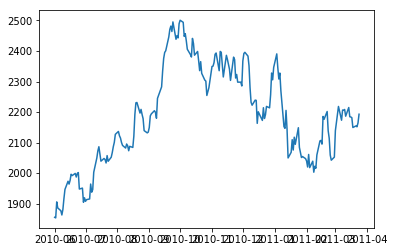

In [158]:
# plt.plot(training_pred)
plt.plot(train_set)

In [122]:
submission = pd.read_csv('data/new_sample_submission.csv')

In [8]:
df1 = pd.read_csv('data/stocks_train/stock_1.csv')

In [14]:
# df1 = df1.set_index('Date')
df1 = df1['Close-Stock-1']
df1.head()

Date
2010-06-01    1855.10
2010-06-02    1853.05
2010-06-03    1905.60
2010-06-04    1885.70
2010-06-07    1876.65
Name: Close-Stock-1, dtype: float64

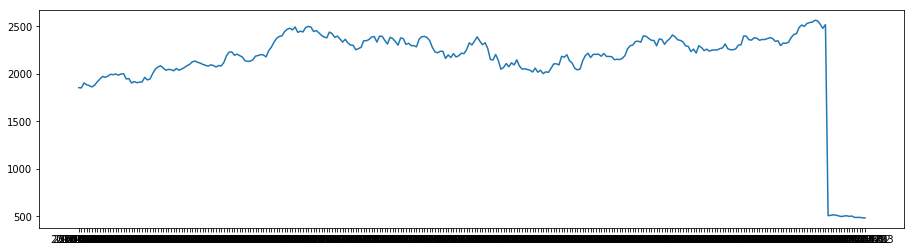

In [23]:
plt.figure(figsize = (15.5,4))
plt.plot(df1)

In [39]:
df = pd.DataFrame(df1).set_index(pd.to_datetime(df1.index))

In [19]:
train = df1[0:209]
val = df1[210:269]
test = df1[269:]

In [51]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df1,p=1,start_q=1,max_p=10,max_d=5,max_q=15,n_fits=200,maxiter=100,seasonal = False,trace = True)

Performing stepwise search to minimize aic
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3730.632, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5448.139, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3728.663, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3730.540, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.48 sec
 ARIMA(2,0,0)(0

In [53]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  299
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1859.355
Date:                Wed, 13 Jan 2021   AIC                           3724.711
Time:                        11:48:28   BIC                           3735.812
Sample:                             0   HQIC                          3729.154
                                - 299                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     45.3185     95.944      0.472      0.637    -142.728     233.365
ar.L1          0.9765      0.041     23.654      0.000       0.896       1.057
sigma2       1.46e+04    396.242     36.855      0.000    1.38e+04    1.54e+04
===================================================================================
Ljung-Box (Q):                        2.70   Jarque-Bera (JB):            778612.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              51.78   Skew:                           -15.15
Prob(H) (two-sided):                  0.00   Kurtosis:                       251.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Performing stepwise search to minimize aic
#  ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2077.462, Time=0.83 sec
#  ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2071.828, Time=0.04 sec
#  ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2073.512, Time=0.16 sec
#  ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2073.517, Time=0.46 sec
#  ARIMA(0,1,0)(0,0,0)[0]             : AIC=2070.491, Time=0.03 sec
#  ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2075.462, Time=0.86 sec

# Best model:  ARIMA(0,1,0)(0,0,0)[0]          
# Total fit time: 2.403 seconds

In [50]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1034.246
Date:                Wed, 13 Jan 2021   AIC                           2070.491
Time:                        11:43:18   BIC                           2073.829
Sample:                             0   HQIC                          2071.841
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1220.2360    112.596     10.837      0.000     999.551    1440.921
===================================================================================
Ljung-Box (Q):                       60.94   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.02   Prob(JB):                         0.69
Heteroskedasticity (H):               2.91   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1034.246
Date:                Wed, 13 Jan 2021   AIC                           2070.491
Time:                        11:40:15   BIC                           2073.829
Sample:                             0   HQIC                          2071.841
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1220.2360    112.596     10.837      0.000     999.551    1440.921
===================================================================================
Ljung-Box (Q):                       60.94   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.02   Prob(JB):                         0.69
Heteroskedasticity (H):               2.91   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,order = (5,1,0)) 
  
result = model.fit() 
result.summary() 

/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close-Stock-1   No. Observations:                  209
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1026.404
Date:                Wed, 13 Jan 2021   AIC                           2064.808
Time:                        12:41:38   BIC                           2084.833
Sample:                             0   HQIC                          2072.905
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0745      0.069      1.073      0.283      -0.062       0.211
ar.L2          0.0088      0.072      0.122      0.903      -0.133       0.150
ar.L3          0.0029      0.063      0.046      0.963      -0.120       0.126
ar.L4          0.1586      0.062      2.546      0.011       0.037       0.281
ar.L5         -0.2244      0.063     -3.574      0.000      -0.347      -0.101
sigma2      1129.7312    122.171      9.247      0.000     890.281    1369.182
===================================================================================
Ljung-Box (Q):                       37.06   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.60   Prob(JB):                         0.79
Heteroskedasticity (H):               2.61   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
start_index = 0
end_index = len(train)-1
train_prediction = result.predict(start_index, end_index) 


In [115]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print('Test RMSE: %.3f' % sqrt(mean_squared_error(train,train_prediction)))
# Test RMSE: 132.972 100
# Test RMSE: 132.968 010
# Test RMSE: 132.633 510

Test RMSE: 132.633


In [60]:
val.shape

(59,)

In [116]:
start_index = 210
end_index = 268
val_pred = result.predict(start_index, end_index)
print('Test RMSE: %.3f' % sqrt(mean_squared_error(val,val_pred)))
# Test RMSE: 86.093

Test RMSE: 79.167
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [117]:
test_pred = result.predict(269, 298)
print('Test RMSE: %.3f' % sqrt(mean_squared_error(test,test_pred)))
# Test RMSE:  1243.583

Test RMSE: 1259.019
/home/p1yu5h/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [49]:
pd.DataFrame(dfrm).append(submission).reset_index().style

/home/p1yu5h/.local/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2010-06-01 00:00:00,1855.1,nan,nan,nan,nan
1,2010-06-02 00:00:00,1853.05,nan,nan,nan,nan
2,2010-06-03 00:00:00,1905.6,nan,nan,nan,nan
3,2010-06-04 00:00:00,1885.7,nan,nan,nan,nan
4,2010-06-07 00:00:00,1876.65,nan,nan,nan,nan
5,2010-06-08 00:00:00,1862.7,nan,nan,nan,nan
6,2010-06-09 00:00:00,1880.9,nan,nan,nan,nan
7,2010-06-10 00:00:00,1916.15,nan,nan,nan,nan
8,2010-06-11 00:00:00,1946.3,nan,nan,nan,nan
9,2010-06-14 00:00:00,1973.15,nan,nan,nan,nan


In [55]:
test_set.shape,val_set.shape

((31,), (60,))